### Learning Path Task 4 : House Price Prediction Using Linear Regression

In [1]:
#Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
house_data=pd.read_csv("house_data.csv")
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Descriptive statistics
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


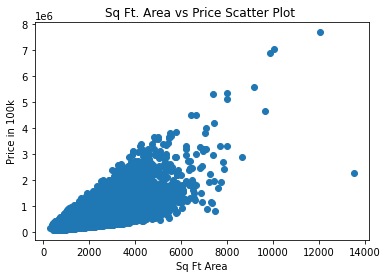

In [4]:
#visualise data , scatter plot for showing you the sq feet area vs price 
plt.scatter(house_data["sqft_living"],house_data["price"])
plt.xlabel("Sq Ft Area")
plt.ylabel("Price in 100k")
plt.title("Sq Ft. Area vs Price Scatter Plot ")
plt.show()

In [6]:
#Defining the input data x and predition y

#Defining Y first

y=house_data["price"]

#now for x we will need all the colomns of the dataframe except price(as we have already taken that)
#and we will also drop unnecesary colomns like id and date which arent relevant to the prediction
x=house_data.drop(["price","id","date"],axis=1)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
#Train the data on the LinearRegression Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model

LinearRegression()

In [82]:
#Now we need to split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.19,random_state=17)
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15385,3,1.5,1340,7200,1.0,0,0,3,7,1340,0,1972,0,98034,47.7180,-122.193,1730,8820
8624,2,1.0,1570,125452,1.0,0,3,4,7,1570,0,1953,0,98022,47.2077,-122.016,1660,46119
19495,2,1.0,770,7200,1.0,0,0,3,7,770,0,1951,0,98125,47.7143,-122.325,1320,7139
15469,2,1.0,1410,7000,1.0,0,0,3,7,1410,0,1968,0,98055,47.4908,-122.223,1540,6000
1188,2,1.0,1230,7560,1.0,0,0,3,7,1230,0,1961,0,98133,47.7298,-122.340,1270,7560


In [83]:
print("x training shape",x_train.shape ,"\n y training shape",y_train.shape,"\n x testing shape",x_test.shape,"\n y testing shape",y_test.shape)

x training shape (17506, 18) 
 y training shape (17506,) 
 x testing shape (4107, 18) 
 y testing shape (4107,)


In [84]:
#now to train the data we will simply call the fit method on our training data
model.fit(x_train,y_train)

LinearRegression()

In [85]:
 #Our model is now trained we will use model.score to test its performace against test data
model.score(x_test,y_test)

0.7111007363334951

In [86]:
#model accuracy
print("Model Accuracy = ",round(model.score(x_test,y_test)*100,2),"%")

Model Accuracy =  71.11 %
